# Poppin 

In [152]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.mode.chained_assignment = None

### Scrape data


#### Scrape 40 most popular list

In [153]:
#https://stockx.com/sneakers/most-popular
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
mostpopularget = requests.get('https://stockx.com/sneakers/most-popular', headers=headers).text
mostpopularpage = BeautifulSoup(mostpopularget, 'html.parser')
sneakerdivs = mostpopularpage.findAll('div', class_='css-1ibvugw-GridProductTileContainer')
#class="css-1ibvugw-GridProductTileContainer"


In [154]:
#print(sneakerdivs[0].prettify())
mostpopular40 = pd.DataFrame()

for index, item in enumerate(sneakerdivs):
    #print(item.prettify())
    link = item.find('a')
    #print(link.attrs['href'])
    sneaker = item.find('p', class_='chakra-text css-3lpefb')
    #print(sneaker.string)
    newsneaker = pd.DataFrame({'Rank': (index+1), 'Sneaker':sneaker.string, 'Link': link.attrs['href']}, index=[index])
    mostpopular40 =  pd.concat([ mostpopular40, newsneaker],ignore_index=True)
    #mostpopular40 = mostpopular40.append({'Rank': (index+1), 'Sneaker':sneaker.string, 'Link': link.attrs['href']}, ignore_index=True, sort=False )
mostpopular40['Date in Most Popular'] = pd.to_datetime('today')

mostpopular40.to_csv('./scrape_pull/'+ str(pd.to_datetime('today').year)+str(pd.to_datetime('today').month)+str(pd.to_datetime('today').day)+'mostpopular40_list.csv')

#### Scrape details for 40 most popular

In [157]:
mostpopular40details = pd.DataFrame()
for index, item in mostpopular40.iterrows():
    #print(index)
    populartarget = requests.get('https://stockx.com'+item['Link'], headers=headers).text
    popularpage = BeautifulSoup(populartarget, 'html.parser')   
    sneakermodel = popularpage.find('h1', class_='chakra-heading css-146c51c')
    #print(sneakermodel.contents[0])
    sneakermodelsubname = popularpage.find('span', class_='chakra-heading css-xgzdo7')
    #print(sneakermodelsubname.string)
    sneakerdetails = popularpage.find_all('p', class_='chakra-text css-ziwxw9')
    #print(sneakerdetails[0].string) # StyleCode
    #print(sneakerdetails[1].string) # Colorway
    #print(sneakerdetails[2].string) # Retail Price
    #releasedate = sneakerdetails[3].string if len(sneakerdetails)==4 else np.nan

    lastsale = popularpage.find('p', class_='chakra-text css-xfmxd4')
    #print(lastsale.string)
    sneakerimage = popularpage.find('div', class_='css-1iec7mm')
    sneakerimageb = popularpage.find('div', class_='css-11a0fku')
    sneakerimagec = popularpage.find('div', class_='css-ps0b2c')
    #if index==37:
    #    print(sneakerimagec)
    newsneaker = pd.DataFrame({'Rank': item['Rank'], 'Sneaker Model':sneakermodel.contents[0], 'Sneaker Name':sneakermodelsubname.string,'Colorway':sneakerdetails[1].string, 'Style Code':sneakerdetails[0].string, 'Release Date': (sneakerdetails[3].string if len(sneakerdetails)==4 else np.nan), 'Retail Price':sneakerdetails[2].string, 'Last Sale':lastsale.string, 'Image Link': (sneakerimage.contents[0].attrs['src'] if sneakerimage!=None else (sneakerimageb.contents[1].attrs['src'] if sneakerimageb!=None else sneakerimagec.contents[1].attrs['src'])) , 'Link': item['Link']}, index=[index])
    mostpopular40details =  pd.concat([ mostpopular40details, newsneaker],ignore_index=True)
mostpopular40details['Date in Most Popular'] = pd.to_datetime('today')

mostpopular40details.to_csv('./scrape_pull/'+ str(pd.to_datetime('today').year)+str(pd.to_datetime('today').month)+str(pd.to_datetime('today').day)+'mostpopular40_details.csv')

<div class="css-ps0b2c"><style data-emotion="css g98gbd">.css-g98gbd{object-fit:contain;}</style><img alt="Jordan 2 Retro SP Union Grey Fog" class="chakra-image css-g98gbd" data-component="StandardImage" fetchpriority="high" height="320px" src="https://images.stockx.com/images/Air-Jordan-2-Retro-Union-Grey-Fog-2.jpg?fit=fill&amp;bg=FFFFFF&amp;w=480&amp;h=320&amp;fm=webp&amp;auto=compress&amp;dpr=2&amp;trim=color&amp;updated_at=1650038041&amp;q=80" srcset="https://images.stockx.com/images/Air-Jordan-2-Retro-Union-Grey-Fog-2.jpg?fit=fill&amp;bg=FFFFFF&amp;w=480&amp;h=320&amp;fm=webp&amp;auto=compress&amp;dpr=1&amp;trim=color&amp;updated_at=1650038041&amp;q=80 1x,
https://images.stockx.com/images/Air-Jordan-2-Retro-Union-Grey-Fog-2.jpg?fit=fill&amp;bg=FFFFFF&amp;w=480&amp;h=320&amp;fm=webp&amp;auto=compress&amp;dpr=2&amp;trim=color&amp;updated_at=1650038041&amp;q=75 2x,
https://images.stockx.com/images/Air-Jordan-2-Retro-Union-Grey-Fog-2.jpg?fit=fill&amp;bg=FFFFFF&amp;w=480&amp;h=320&amp;

#### Daily Visualizations

Brand Data

<AxesSubplot:xlabel='Count', ylabel='Brand'>

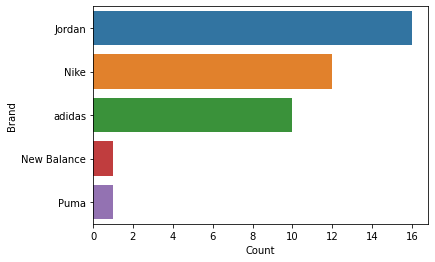

In [199]:

temp = mostpopular40['Sneaker'].str.split(' ', n=1, expand=True)

brands =temp[0].unique()

branddata = pd.DataFrame()
for brand in brands:
    newbrand = pd.DataFrame({'Brand': brand, 'Count': np.count_nonzero(temp[0]==brand)}, index=[0])
    branddata = pd.concat([branddata, newbrand], ignore_index=True)
branddata['Brand'] = np.where(branddata['Brand']=='New', 'New Balance', branddata['Brand'])
branddata = branddata.sort_values(by=['Count'], ascending=False)

sns.barplot(y=branddata['Brand'], x=branddata['Count'])

Model Data

<AxesSubplot:xlabel='Count', ylabel='Model'>

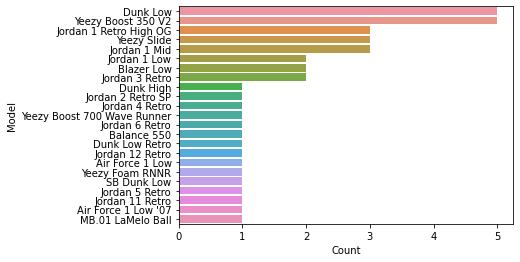

In [198]:
sneaker = pd.DataFrame({'Model': mostpopular40details['Sneaker Model']})
#print(sneaker)
for brand in brands:
    if brand != 'Jordan':
        sneaker['Model'] = np.where(sneaker['Model'].str.contains(brand), sneaker['Model'].str.replace(brand+' ', ''), sneaker['Model'])
models = sneaker['Model'].unique()

modeldata = pd.DataFrame()
for model in models:
    newmodel = pd.DataFrame({'Model': model, 'Count': np.count_nonzero(sneaker['Model']==model)}, index=[0])
    modeldata = pd.concat([modeldata, newmodel], ignore_index=True)
modeldata = modeldata.sort_values(by=['Count'], ascending=False)

sns.barplot(y=modeldata['Model'], x=modeldata['Count'])